# A Brief Analysis of President Obama's Speeches from Inauguration to Farewell (420 Speeches)

In [1]:
import nltk # this is a good package but tends to be used more in education
# here's the link for the manual: http://www.nltk.org/book/
import spacy # this is a better package to use for text analysis

In [2]:
# make sure that the directory here points to the 'all_obama_speeches.txt' file.
# Remember you can use terminal functions like pwd, cd, ls etc to make that happen
# I have left my original path in as a reference point

In [3]:
cd /Users/qntm/Documents/Education/data_science/data_sets/speeches/obama

/Users/qntm/Documents/Education/data_science/data_sets/speeches/obama


In [4]:
ls

Untitled.txt                    output_txt/
all_obama_speech_web_links.rtf  speeches pdf/
all_obama_speeches.txt


In [5]:
f=open('all_obama_speeches.txt')
raw=f.read()
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

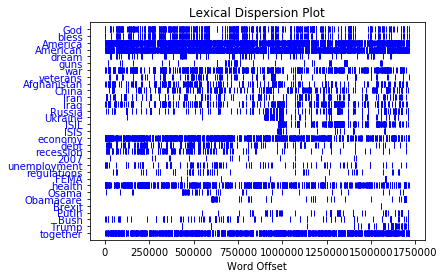

In [7]:
# I have picked out key words I think are the most 'fun' to see on a chart
# perhaps a little self-serving
# as per usual, the most important things to people (especially Americans) are guns, money, war and god!
text.dispersion_plot(["God", "bless", "America", "American", "dream","guns", "war", "veterans",
                      "Afghanistan","China","Iran", "Iraq","Russia","Ukraine","ISIL", "ISIS",
                      "economy","debt", "recession", "2007","unemployment","regulations", "FEMA", 
                      "health", "Osama", "Obamacare", "Brexit", "Putin", "Bush", "Trump", "together"])

In [8]:
total_words = len(text)
print(total_words, "total words used over 420 speeches")

1715397 total words used over 420 speeches


In [9]:
unique_words = len(set(text))
print(unique_words, "unique words used in all speeches")

31136 unique words used in all speeches


In [10]:
# pretty simple function which is essentially unique_words / total_words * 100
def lexical_diversity(text_in):
    total_words = len(text_in)
    total_unique = len(set(text_in))
    lex_div = (total_unique / total_words) * 100
    return lex_div

In [11]:
lex_d = lexical_diversity(text)
print("{:.2f}".format(lex_d),'% diversity')

1.82 % diversity


In [12]:
# unique words in all speeches
set(text)

{'nue',
 'perversions',
 'dead',
 'cathedral',
 '80th',
 'partnerships',
 'adjustments',
 'Generation',
 'eaten',
 'Rami',
 'secondly',
 'Bonobos',
 'middle-aged',
 'Fourth',
 'industrialized',
 'obtaining',
 'decry',
 'sicknesses',
 'Iran;',
 'insured',
 'credit-card',
 'unipolar',
 'Mine',
 'Delegates',
 'Terrell',
 'Intercontinental',
 'retells',
 'Upon',
 'self-determination',
 'Cuban-American',
 'airbrush',
 'corrects',
 'Neda',
 'Cherokee',
 'acts',
 'fo',
 'help',
 'Klein',
 'Copeny',
 'ands',
 'secretly',
 'Sunnylands',
 'trailer',
 'IX',
 'Frida',
 'Tobacco-Free',
 'dust',
 'exploration',
 'scout',
 'wartime',
 'yards',
 'undergarments.',
 'sanctioning',
 'justice;',
 'filibuster',
 'shrouded',
 'transitioned',
 'acy',
 '60',
 'Lejeune',
 '1993',
 'disloyal',
 'reentered',
 'batteries',
 'Prize-winning',
 'lot',
 'Estefan',
 'Goals',
 'Zawiya',
 'Fourchon',
 'most-representative',
 'pipe',
 'papered',
 'broadcasting',
 'danger-',
 'cros',
 'der',
 'advises',
 'Grandma',
 'goin

In [13]:
def dispersion_plot(text, words, ignore_case=False, title="Lexical Dispersion Plot"):
    try:
        from matplotlib import pylab
    except ImportError:
        raise ValueError

    text = list(text)
    words.reverse()

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [(x,y) for x in range(len(text_to_comp))
                    for y in range(len(words_to_comp))
                    if text_to_comp[x] == words_to_comp[y]]
    if points:
        x, y = list(zip(*points))
    else:
        x = y = ()
    pylab.plot(x, y, "b|", scalex=.1)
    pylab.yticks(list(range(len(words))), words, color="b")
    pylab.ylim(-1, len(words))
    pylab.title(title)
    pylab.xlabel("Word Offset")
    pylab.show()